In [1]:
# Importing Libraries
import pandas as pd

# Load the dataset
file_path = 'emails.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [2]:
# Importing Libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers, special characters, and punctuation
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join words back to string
    text = ' '.join(words)
    return text

# Apply preprocessing to each email
data['text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the processed dataframe
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject color print special request addit info...,1
4,subject money get softwar cd softwar compat gr...,1


# Alternate way to remove stopwords

### Define a list of English stopwords
`
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", 
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", 
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", 
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", 
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", 
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", 
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "d", 
    "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", 
    "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn", 
    "weren", "won", "wouldn"
])

def preprocess_text_simple(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers, special characters, and punctuation
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize text (split into words)
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Join words back to string
    text = ' '.join(words)
    return text


### Apply simple preprocessing to each email

data['text'] = data['text'].apply(preprocess_text_simple)

### Display the first few rows of the processed dataframe

data.head()
`

In [19]:
# !pip install wordcloud

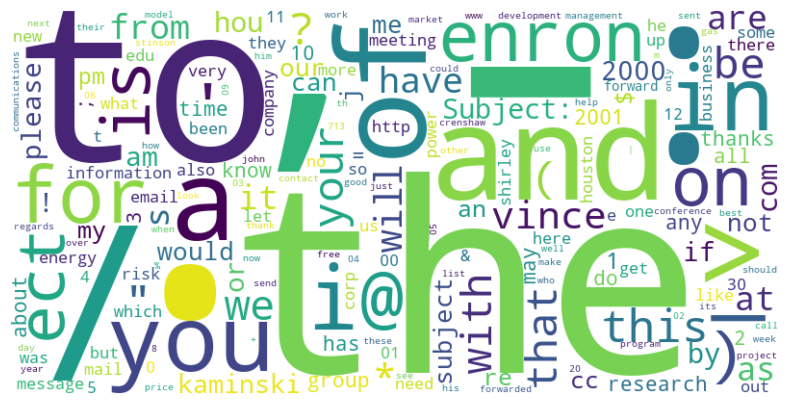

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all emails into one large string
all_text = ' '.join(data['text'])

# Tokenize the text into words
words = all_text.split()

# Calculate the frequency of each word
word_freq = Counter(words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the 'text' column to numerical features
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

# Get the target values
y = data['spam']

# Split the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.9773123909249564
Precision: 0.9888888888888889
Recall: 0.9206896551724137
F1-Score: 0.9535714285714285


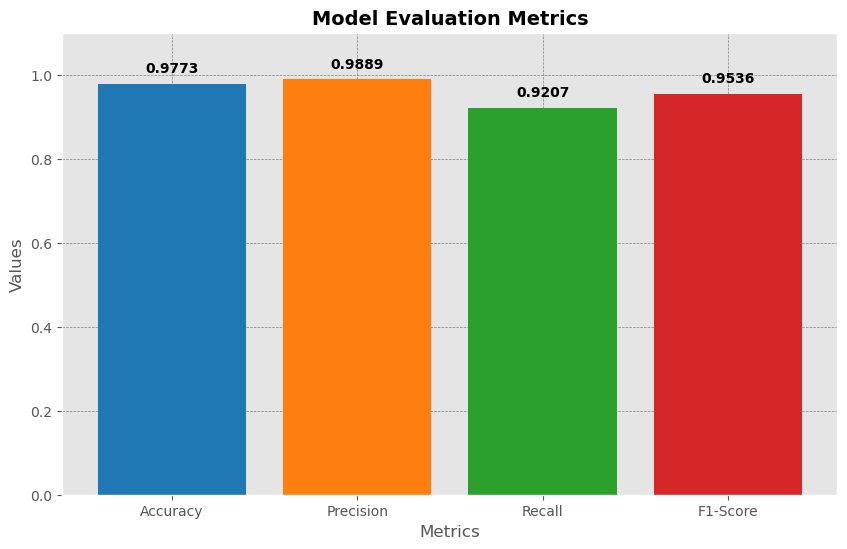

In [18]:
# Setting a style
plt.style.use('ggplot')

# Creating the bar plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Adding the title and labels
plt.title('Model Evaluation Metrics', fontsize=14, fontweight='bold')
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.ylim(0, 1.1)  # Limiting y-axis from 0 to 1 and adding some space for annotations

# Adding grid
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.gca().set_axisbelow(True)

# Adding the text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, round(yval, 4), va='bottom', ha='center', fontsize=10, fontweight='bold', color='black')

plt.show()

In [21]:
import pickle

# Save the model to disk
filename = 'model.sav'
pickle.dump(nb_classifier, open(filename, 'wb'))

In [25]:
# Assuming tfidf_vectorizer is your trained TF-IDF vectorizer
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

# Using Neural Network

In [26]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('emails.csv')

In [27]:
# Importing Libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import nltk

# # Download necessary NLTK datasets
# nltk.download('punkt')
# nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers, special characters, and punctuation
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Join words back to string
    text = ' '.join(words)
    return text

# Apply preprocessing to each email
data['text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Define the tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
max_sequence_length = max(len(x) for x in sequences)
X_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Labels
y = data['spam']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPool1D, Dense

model = Sequential([
    Embedding(input_dim=5000, output_dim=50, input_length=max_sequence_length),
    GlobalMaxPool1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


144/144 [==============================] - 5s 25ms/step - loss: 0.4739 - accuracy: 0.7597 - val_loss: 0.3070 - val_accuracy: 0.7775
Epoch 2/10
144/144 [==============================] - 3s 24ms/step - loss: 0.1430 - accuracy: 0.9555 - val_loss: 0.0712 - val_accuracy: 0.9860
Epoch 3/10
144/144 [==============================] - 3s 23ms/step - loss: 0.0345 - accuracy: 0.9948 - val_loss: 0.0464 - val_accuracy: 0.9852
Epoch 4/10
144/144 [==============================] - 3s 23ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0351 - val_accuracy: 0.9895
Epoch 5/10
144/144 [==============================] - 3s 22ms/step - loss: 0.0071 - accuracy: 0.9993 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 6/10
144/144 [==============================] - 3s 23ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.0280 - val_accuracy: 0.9895
Epoch 7/10
144/144 [==============================] - 3s 24ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.99

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

36/36 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9887
Test Accuracy: 0.988656222820282


In [33]:
def predict_spam(email_content):
    preprocessed = preprocess_text(email_content)
    sequence = tokenizer.texts_to_sequences([preprocessed])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    prediction = model.predict(padded_sequence)
    return 'Spam' if prediction[0][0] > 0.5 else 'Not Spam'

# Test with a new email
print(predict_spam('''Help those in need! Your small donation can save lives. We're collecting funds for [Crisis/Event]. Show your support by donating here.'''))

1/1 [==============================] - 0s 14ms/step
Spam


In [34]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_spam_model.h5') 

C:\Users\tiwar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming 'data['text']' is your text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['text'])

# Saving the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)